In [3]:
from google.colab import files
uploaded = files.upload()

Saving natasha.png to natasha.png


In [0]:
import numpy as np
import cv2
import timeit
from matplotlib import pyplot as plt
from PIL import Image

In [0]:
def integralImage(img):
    height = img.shape[0]
    width = img.shape[1]
    int_image = np.zeros((height, width), np.uint64)
    for y in range(height):
        for x in range(width):
            up = 0 if (y-1 < 0) else int_image.item((y-1, x))
            left = 0 if (x-1 < 0) else int_image.item((y, x-1))
            diagonal = 0 if (x-1 < 0 or y-1 < 0) else int_image.item((y-1, x-1))
            val = img.item((y, x)) + int(up) + int(left) - int(diagonal)
            int_image.itemset((y, x), val)
    return int_image

def adjustEdges(height, width, point):
    newPoint = [point[0], point[1]]
    if point[0] >= height:
        newPoint[0] = height -1

    if point[1] >= width:
        newPoint[1] = width -1
    return tuple(newPoint)

def findImageArea(int_img, botR, botL, TopR, TopL):
    """
    Finds the area using the integral image.
    botR = bottomRight
    botL = bottomLeft
    TopR = topRight
    TopL = topLeft
    """
    height = int_img.shape[0]
    width = int_img.shape[1]
    botR = adjustEdges(height, width, botR)
    botL = adjustEdges(height, width, botL)
    TopR = adjustEdges(height, width, TopR)
    TopL = adjustEdges(height, width, TopL)

    botR = 0 if (botR[0] < 0 or botR[0] >= height) or (botR[1] < 0 or botR[1] >= width) else int_img.item(botR[0], botR[1])
    botL = 0 if (botL[0] < 0 or botL[0] >= height) or (botL[1] < 0 or botL[1] >= width) else int_img.item(botL[0], botL[1])
    TopR = 0 if (TopR[0] < 0 or TopR[0] >= height) or (TopR[1] < 0 or TopR[1] >= width) else int_img.item(TopR[0], TopR[1])
    TopL = 0 if (TopL[0] < 0 or TopL[0] >= height) or (TopL[1] < 0 or TopL[1] >= width) else int_img.item(TopL[0], TopL[1])

    return botR + TopL - botL - TopR


def fastBoxFilter(img, filterSize):
    """
    Runs the subsequent box filtering steps. Prints original image, finds integral image, and then outputs final image
    img: An image in matrix form.
    filterSize: The filter size of the matrix
    """
    start = timeit.default_timer()
    height = img.shape[0]
    width = img.shape[1]
    intImg = integralImage(img)
    finalImg = np.ones((height, width), np.uint64)
    loc = int(filterSize/2)
    for y in range(height):
        for x in range(width):
            finalImg.itemset((y, x), findImageArea(intImg, (y-loc-1, x-loc-1), (y-loc-1, x+loc), (y+loc, x-loc-1), (y+loc, x+loc))/(filterSize**2))

    end = timeit.default_timer()
    print("Fast box filter",end - start)
    plt.subplot(121),plt.imshow(img, cmap='gray', vmax=255),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(finalImg, cmap='gray', vmax=255),plt.title('burred')
    plt.xticks([]), plt.yticks([])
    plt.show()
    

def simpleBoxfilter(image, fsize):
    start = timeit.default_timer()
    width = image.shape[1]
    height = image.shape[0]

    b = np.zeros((height, width))
    size = int(fsize/2)
    for y in range(size, height - size):
        for x in range(size, width - size):
            sum = 0
            for k in range(-size, size + 1):
                for l in range(-size, size + 1):
                    a = image[y + k, x + l]
                    sum = sum + a
            b[y,x] = int(sum / (fsize * fsize ))
    end = timeit.default_timer()
    print("Simple box filter", end - start)
    plt.subplot(121),plt.imshow(image, cmap='gray', vmax=255),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(b, cmap='gray', vmax=255),plt.title('burred')
    plt.xticks([]), plt.yticks([])
    plt.show()
  


Simple box filter 2.125165484000007


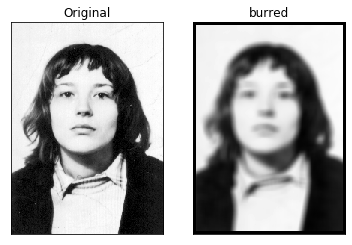

In [6]:
image = cv2.imread("natasha.png",0)

simpleBoxfilter(image,9)

Fast box filter 0.28840063500001634


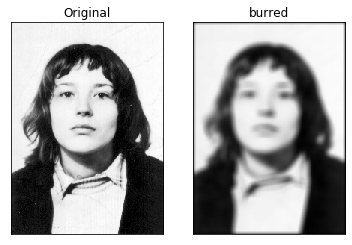

In [9]:
fastBoxFilter(image, 9)